In [2]:
# First, we'll import the libraries for analysis.
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from numpy import median

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DATABASES/CASE.txt')

#1-Análise Exploratória 

**Compreendendo os dados:**

**transaction_id:** Id da transação.

**merchant_id:** Id do lojista.

**user_id:** Id do usuário.

**card_number:** Cartão de credito usado na compra.

**transaction_date:** Data da transação.

**transaction_amount:** Valor da transação.

**id_device:** Id do dispositivo (Alguns dispositivos não possuem).

**has_cbk:** Se houve ou não estorno.

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Iniciaremos a análise exploratória dos dados

In [6]:
df.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.00,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.00,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.00,False


In [7]:
df.rename(columns={'has_cbk': 'cbk'}, inplace=True)

In [8]:
df.dtypes

transaction_id          int64
merchant_id             int64
user_id                 int64
card_number            object
transaction_date       object
transaction_amount    float64
device_id             float64
cbk                      bool
dtype: object

In [9]:
# Transforming transaction_date to datetime.
cols = ['transaction_date']
for col in cols:
  df[col] = pd.to_datetime(df[col])

In [10]:
df.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,cbk
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.00,False
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.00,True
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:53.347051,55.36,860232.00,False


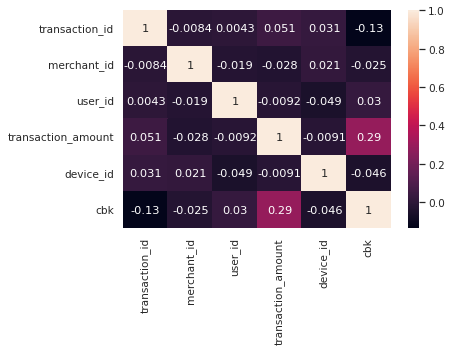

In [11]:
sns.heatmap(df.corr(),annot=True)

As duas variáveis com maior correlação são **transaction_amount** e  **cbk**, inciaremos a análise por elas.

In [12]:
# Let´s analyze the descriptive statistics of transaction_amount.
df['transaction_amount'].describe()

count   3199.00
mean     767.81
std      889.10
min        1.22
25%      205.24
50%      415.94
75%      981.68
max     4097.21
Name: transaction_amount, dtype: float64

In [13]:
# Extracting the number of users and merchants.
unique_users = df["user_id"].nunique()
unique_merchants = df["merchant_id"].nunique()
print("number of customers: {}".format(unique_users))
print("number of merchants: {}".format(unique_merchants))

number of customers: 2704
number of merchants: 1756


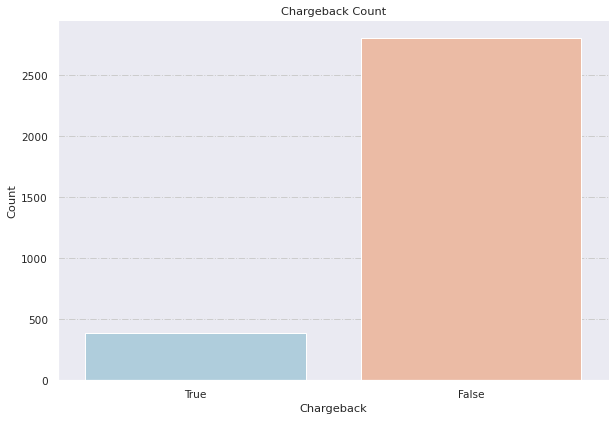

In [14]:
sns.set_style("darkgrid", {"grid.color": ".8", "grid.linestyle": "-."})
sns.set_context("notebook", font_scale=0.95)

sns.catplot(
    data=df, x="cbk", 
            order=[True,False], kind='count', height = 5.8,
                aspect=6.3/4.2, palette='RdBu_r'
)

plt.title("Chargeback Count")
plt.xlabel("Chargeback")
plt.ylabel("Count")
plt.show()

Algumas informações importantes: A base de dados contém **2704** clientes e **1756** comerciantes, temos o total de **3199** transações, a taxa de estorno esta em  12%, muito acima do aceitavel, a taxa de estorno é considerada aceitavel entre 0,65 e 0,9%, altas taxas de estorno podem ocasionar multas e cancelamentos de serviços para os comerciantes.

In [ ]:
# Let´s see the dataset only with chargeback.
cbk_df = df[df['cbk']==True]

In [ ]:
# Let´s analyze the descriptive statistics of transaction_amount in dataset only with chargeback.
cbk_df['transaction_amount'].describe()

count    391.00
mean    1453.57
std     1169.49
min        2.89
25%      565.58
50%      999.47
75%     2140.68
max     4097.21
Name: transaction_amount, dtype: float64

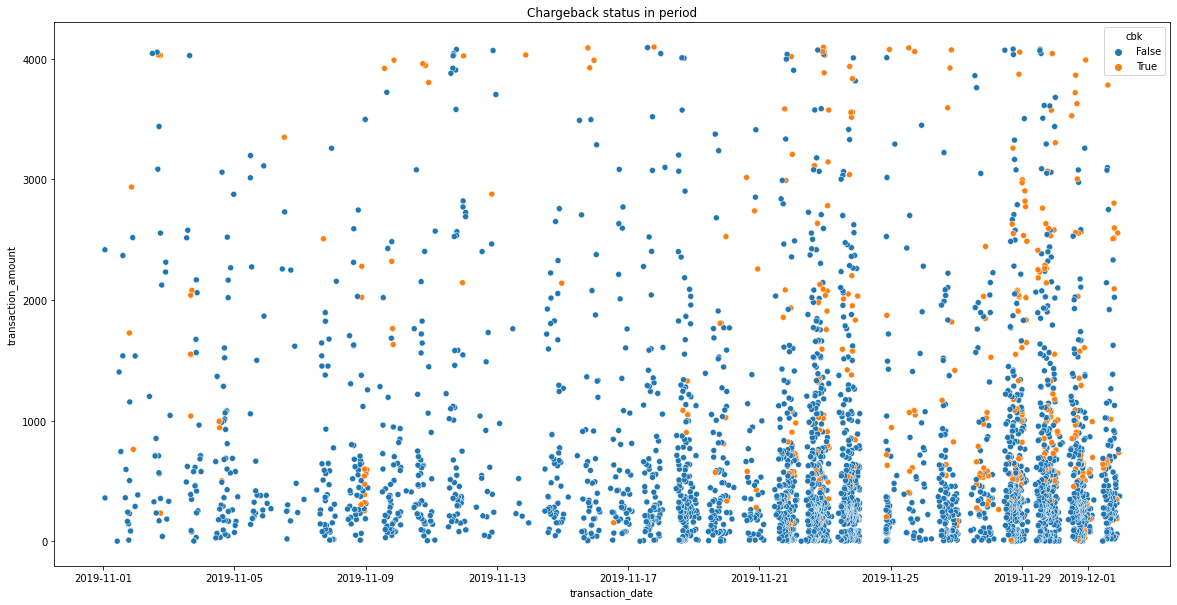

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Chargeback status in period', loc='center')
ax = sns.scatterplot(data=df, x="transaction_date", y="transaction_amount", hue="cbk")


O período analisado é de 30 dias, do início de novembro até o início de dezembro.
A maior quantidade de transações ocorrem no período mais proximo do fim do ano, em razão das festas.

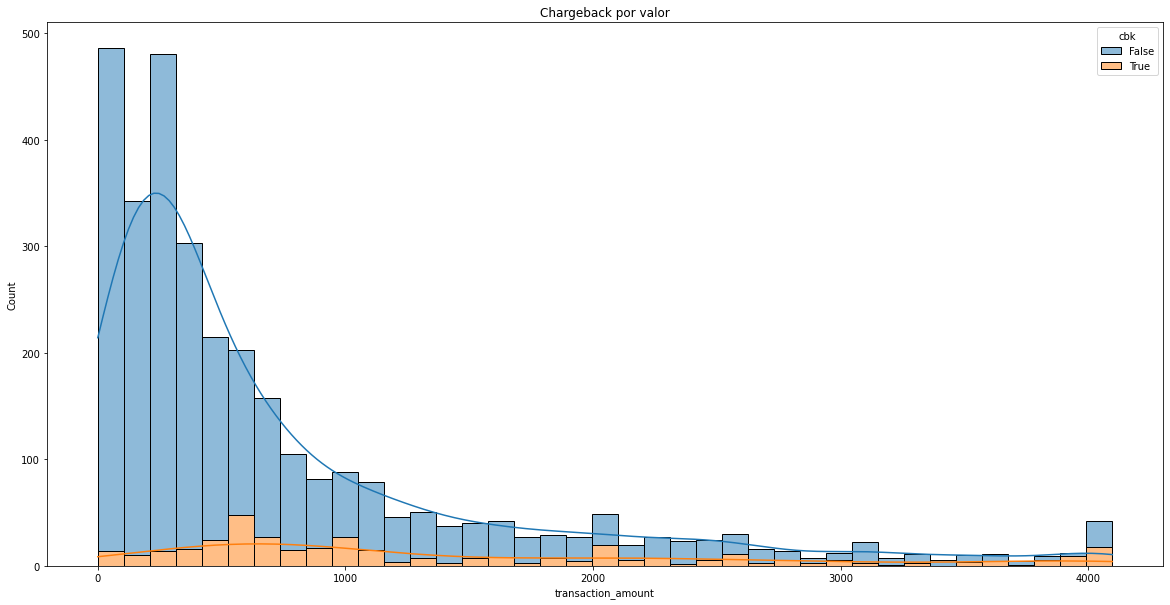

In [ ]:
# Histogram with transactions values  in the dataset with chargeback.
plt.figure(figsize=(20,10))
plt.title('Chargeback por valor', loc='center')
sns.histplot(data=df, x="transaction_amount",hue='cbk',multiple="stack",kde=True)


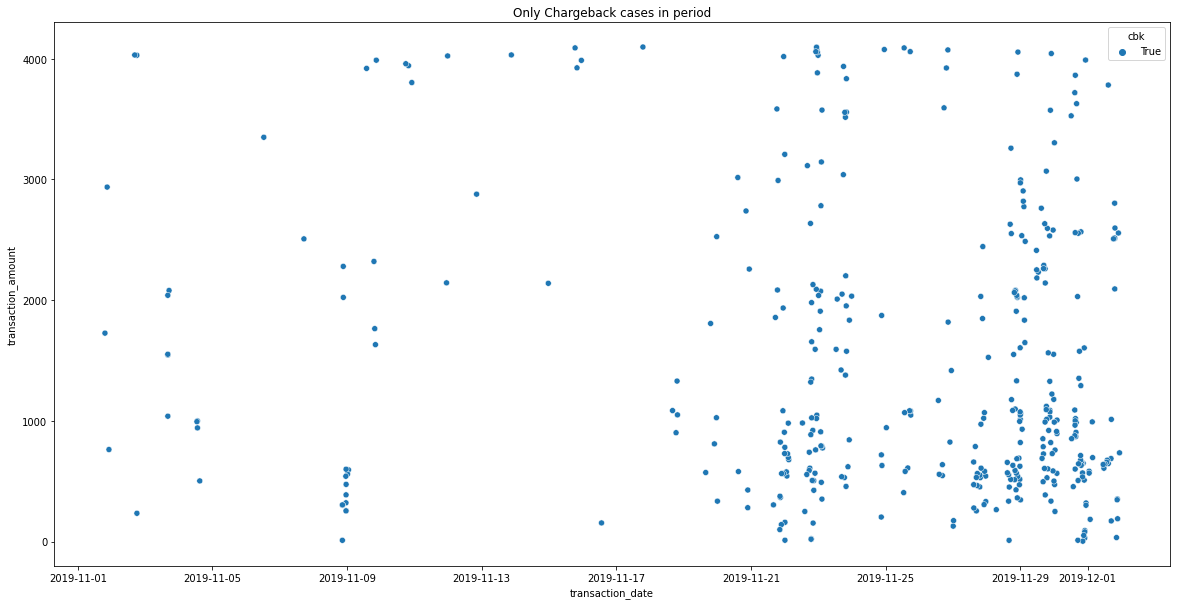

In [ ]:
# Let´s see only chargeback cases in the period 
plt.figure(figsize=(20,10))
plt.title('Only Chargeback cases in period', loc='center')
ax = sns.scatterplot(data=cbk_df, x="transaction_date", y="transaction_amount", hue="cbk")

A maior quantidade de estornos ocorrem no final do período analisado, e com compras de valores menores, indicando que os estornos estão relacionados a quantidade de transações e não aos valores.

In [ ]:
# Let´s undestand the dataset only with chargeback cases.
cbk_df.head(20)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,cbk
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.00,True
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,True
7,21320405,56107,81152,650516******9201,2019-12-01 21:24:05.608374,188.68,486.00,True
8,21320406,56107,81152,650516******9201,2019-12-01 21:13:21.529999,352.77,486.00,True
9,21320407,56107,81152,650516******9201,2019-12-01 21:04:55.066909,345.68,486.00,True
13,21320411,56107,81152,650516******7004,2019-12-01 20:36:55.091278,32.86,486.00,True
26,21320424,53816,5541,606282******3381,2019-12-01 19:31:20.047571,2597.51,656429.00,True
28,21320426,11470,5541,606282******3381,2019-12-01 19:26:01.352512,2511.43,656429.00,True
30,21320428,73271,7725,489391******7420,2019-12-01 19:22:45.419831,2092.79,308950.00,True
32,21320430,56977,69758,464296******3991,2019-12-01 19:17:21.731168,2803.32,NaN,True


É possivel observar que:

1- Clientes com muitas transações e no mesmo lojista, tiveram estorno em todas elas.

2- Clientes com transações de valores semelhantes em estabelecimentos diferentes, tiveram estorno em todos eles.

3- Todos esses clientes têm mais de um cartão de crédito.


In [ ]:
# Let´s see how many transactions these customers had.
cbk_transct = cbk_df.groupby('user_id')['transaction_id'].count()

In [ ]:

morethanone_df = cbk_transct[cbk_transct > 1]
print("customers with more than one chargeback:" + str(len(morethanone_df)))

customers with more than one chargeback:78


In [ ]:
ranking_df = pd.DataFrame(morethanone_df)
top_df = ranking_df.sort_values(
    by='transaction_id', ascending=False).head().reset_index().rename(
    columns={'transaction_id':'transactions'}
)


In [ ]:
top_df.head()

,user_id,transactions
0,11750,25
1,91637,19
2,79054,15
3,96025,13
4,78262,12


Tivemos um total de 78 clientes com casos de estorno, foi criado o ranking dos principais clientes suspeitos, vamos criar o dataset final.

In [ ]:
ranking_final = top_df.merge(cbk_df, on='user_id', how='inner').sort_values(by='transactions', ascending=False)

In [ ]:
ranking_final.drop(columns=['device_id','transaction_date'],inplace=True)

In [ ]:
df_final = ranking_final.groupby('user_id')[['transaction_id','card_number','merchant_id']].nunique().rename(columns={'transaction_id': 'transactions', 'merchant_id': 'merchants'}).sort_values(by='transactions',ascending=False)

In [ ]:
ranking_final.head()

,user_id,transactions,transaction_id,merchant_id,card_number,transaction_amount,cbk
0,11750,25,21320460,66876,453211******1392,687.57,True
13,11750,25,21320931,17275,453211******8822,528.46,True
1,11750,25,21320498,17275,453211******1531,674.23,True
24,11750,25,21322189,17275,498401******9945,506.11,True
23,11750,25,21321874,17275,498401******6342,529.86,True


In [ ]:
df_final.head()

,transactions,card_number,merchants
user_id,,,
11750,25,25,2
91637,19,19,1
79054,15,13,4
96025,13,9,2
78262,12,9,3


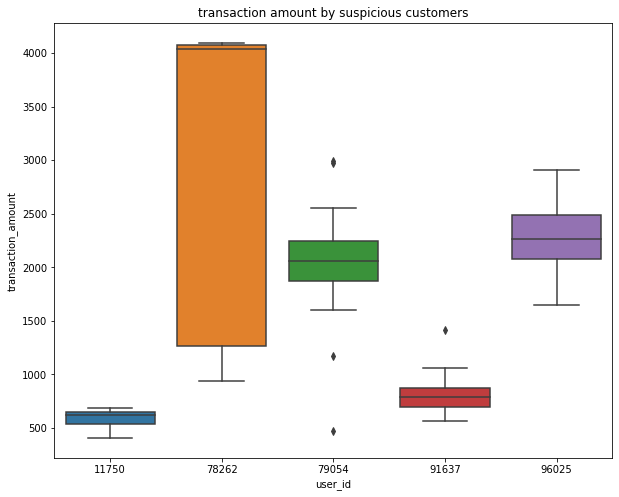

In [ ]:
plt.figure(figsize=(10,8))
plt.title("transaction amount by suspicious customers")
sns.boxplot(x=ranking_final['user_id'], y=ranking_final['transaction_amount'])

# 2-CONCLUSÃO

O comportamento de clientes suspeitos trouxe informações importantes, podemos concluir:


1.   Eles têm mais de um cartão de crédito.
2.   Fizeram transações com um ou mais comerciantes.
3.   Clientes com valores médios de transação mais baixos e com maior número de cartões de crédito tiveram mais estornos.

As atividades suspeitas estão mais atreladas a clientes com aparente menor poder aquisitivo e grande número de cartões de crédito, indicando que esses clientes podem utilizar mais de um cartão para realizar uma transação, pois também são os que possuem maior número de transações, dados como  o tipo de produto ou serviço adquirido podem ser úteis para analisar melhor o comportamento desses clientes, ajudando a entender o motivo de estornos e atividades suspeitas.





